# Analyzing Bay Wheels trip data on April 2020
### by Gabriel Medeiros das Neves

## Introduction

Write a briefly introduction to the study and the dataset here.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Wrangling
In this section of the report I will gather the necessary data, understand its general properties, identify and clean possible issues, such as missing or incorrect values, for example.

### Gather
Here I'll be converting the provided `.csv` file in a Pandas DataFrame.

In [2]:
trip_data = pd.read_csv('baywheels_tripdata.csv')
trip_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5A1FF31692371859,electric_bike,2020-04-04 08:28:20,2020-04-04 08:33:34,NaN,NaN,NaN,NaN,37.7692,-122.4209,37.7703,-122.4069,casual
1,D8D5BA2D4F051133,electric_bike,2020-04-03 18:55:43,2020-04-03 19:21:05,NaN,NaN,NaN,NaN,37.8023,-122.4244,37.8023,-122.4244,casual
2,A3633A9140CA4FF8,electric_bike,2020-04-04 15:11:04,2020-04-04 15:12:21,NaN,NaN,NaN,NaN,37.7667,-122.3961,37.7667,-122.3962,casual
3,301F57EB0197A5E0,electric_bike,2020-04-03 20:21:03,2020-04-03 22:08:06,8th St at Ringold St,60.0,NaN,NaN,37.7744,-122.4095,37.7805,-122.4033,casual
4,9429C701AF5744B3,electric_bike,2020-04-03 18:39:39,2020-04-03 18:47:19,NaN,NaN,NaN,NaN,37.8027,-122.4433,37.8009,-122.4269,casual


### Assess
The main objective of the Assess section is to better understand each piece of data and identify possible issues that must be cleaned.

In [3]:
trip_data.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
84063,ED962D9310616ADB,docked_bike,2020-04-03 08:11:19,2020-04-03 08:16:43,Vine St at Shattuck Ave,254.0,Downtown Berkeley BART,245.0,37.8802,-122.2696,37.8701,-122.2684,member
69559,04F9644F2ACE01FC,electric_bike,2020-04-30 19:29:50,2020-04-30 20:08:58,Mercado Way at Sierra Rd,444.0,Mercado Way at Sierra Rd,444.0,37.3713,-121.8812,37.3712,-121.8813,member
37617,F243F36C6A0DB8BF,electric_bike,2020-04-03 18:40:47,2020-04-03 18:53:52,Jones St at Post St,370.0,Dolores St at 15th St,96.0,37.7872,-122.4134,37.7662,-122.4267,member
19288,5197F695D6F86F87,electric_bike,2020-04-24 04:39:24,2020-04-24 05:00:22,NaN,NaN,NaN,NaN,37.3368,-121.9500,37.3323,-121.9140,casual
36607,76C1CDB0368C9AAD,docked_bike,2020-04-09 12:08:25,2020-04-09 12:19:55,Duboce Park,84.0,19th St at Florida St,124.0,37.7692,-122.4338,37.7604,-122.4108,member


In [4]:
trip_data.shape

(84259, 13)

In [5]:
trip_data.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [6]:
trip_data.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    30825
start_station_id      30825
end_station_name      32401
end_station_id        32401
start_lat                 0
start_lng                 0
end_lat                 142
end_lng                 142
member_casual             0
dtype: int64

In [7]:
trip_data.rideable_type.unique()

array(['electric_bike', 'docked_bike'], dtype=object)

In [8]:
trip_data.member_casual.unique()

array(['casual', 'member'], dtype=object)

In [9]:
trip_data.start_station_name.unique()

array([nan, '8th St at Ringold St', 'Chestnut St at Van Ness Ave',
       'Buchanan St at North Point St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Post St at Webster St', '4th St at 16th St',
       'McKinnon Ave at 3rd St', 'Precita Park', 'Central Ave at Fell St',
       'Funston Ave at Fulton St', 'Steiner St at California St',
       'The Embarcadero at Bryant St', 'Market St at Steuart St',
       'Leavenworth St at Broadway',
       'Union Square (Powell St at Post St)', '10th St at Empire St',
       'Market St at Dolores St', 'Davis St at Jackson St',
       'Salesforce Transit Center (Natoma St at 2nd St)',
       '4th St at Mission Bay Blvd S', '23rd St at Taylor St',
       'Folsom St at 19th St', '15th St at Potrero Ave',
       'Market St at 10th St', 'Jones St at Post St',
       'Fell St at Stanyan St', 'Octavia Blvd at Page St',
       'Eureka Valley Recreation Center', 'S Park St at 3rd St',
       'Golden Gate Ave at Hyde St', 'Sonora Ave at

In [10]:
trip_data.end_station_name.unique()

array([nan, '4th St at 16th St',
       'Montgomery St BART Station (Market St at 2nd St)', 'Precita Park',
       'Grove St at Divisadero',
       'Garfield Square (25th St at Harrison St)',
       'Post St at Webster St', 'Broderick St at Oak St',
       'Central Ave at Fell St', 'Greenwich St at Franklin St',
       '10th St at Empire St', 'Leavenworth St at Broadway',
       'Davis St at Jackson St', '4th St at Mission Bay Blvd S',
       'San Francisco Public Library (Grove St at Hyde St)',
       '15th St at Potrero Ave', '23rd St at Tennessee St',
       'Mission Playground', 'Jones St at Post St',
       'Market St at Dolores St', 'Fell St at Stanyan St',
       'Golden Gate Ave at Polk St', 'S Park St at 3rd St',
       'Sonora Ave at 1st St', '20th St at Bryant St',
       'Market St at 10th St', 'Scott St at Golden Gate Ave',
       'Broadway at Kearny',
       'San Francisco Caltrain (Townsend St at 4th St)',
       '23rd St at Taylor St', 'Parker Ave at McAllister St',
   

In [11]:
trip_data.started_at.iloc[0]

'2020-04-04 08:28:20'

#### Observed Issues

1. Missing data in **station columns** and **end coordinates**.
2. **Date columns** are strings instead of datetime.
3. The column name **"member_casual"** does not match the column values, since the column is representing the user account type.
4. There are some unhelpful columns for the scope of this analysis.

### Clean
Here I will be defining and executing programmatic solutions for each identified issue in the Assess section, as well as testing whether the proposed solution solved the problem or not.

#### Define
1. The missing stations will be filled with **"Not informed"** values, while the coordinates columns will not be filled as they do not belong to the scope of this analysis.
2. Use the pandas [to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) method to convert column values to datetime.
3. Rename column to **"account_type"**.
4. Drop `ride_id`, `start_station_id`, `end_station_id`, `start_lat`, `start_lng`, `end_lat` and `end_lng` columns.

#### Code and Test
Here I will be using code techniques to clean up the data as planned in the **Define** section.

In [12]:
clean_trip_data = trip_data.copy()

In [13]:
clean_trip_data.drop(['ride_id', 'start_station_id', 
                      'end_station_id', 'start_lat', 
                      'start_lng', 'end_lat', 'end_lng'], axis=1, inplace=True)
clean_trip_data.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
0,electric_bike,2020-04-04 08:28:20,2020-04-04 08:33:34,NaN,NaN,casual
1,electric_bike,2020-04-03 18:55:43,2020-04-03 19:21:05,NaN,NaN,casual
2,electric_bike,2020-04-04 15:11:04,2020-04-04 15:12:21,NaN,NaN,casual
3,electric_bike,2020-04-03 20:21:03,2020-04-03 22:08:06,8th St at Ringold St,NaN,casual
4,electric_bike,2020-04-03 18:39:39,2020-04-03 18:47:19,NaN,NaN,casual


In [14]:
clean_trip_data.fillna('None', inplace=True)
clean_trip_data.isnull().sum()

rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
member_casual         0
dtype: int64

In [15]:
clean_trip_data['started_at'] = pd.to_datetime(clean_trip_data.started_at)
clean_trip_data['ended_at'] = pd.to_datetime(clean_trip_data.ended_at)
clean_trip_data.started_at.iloc[0]

Timestamp('2020-04-04 08:28:20')

In [16]:
clean_trip_data.rename(columns={'member_casual': 'account_type'}, inplace=True)
clean_trip_data.sample(5)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,account_type
9498,electric_bike,2020-04-27 15:53:54,2020-04-27 16:02:34,None,None,casual
60812,electric_bike,2020-04-24 15:40:41,2020-04-24 16:03:38,Mechanics Monument Plaza (Market St at Bush St),18th St at Noe St,member
6768,electric_bike,2020-04-04 13:54:52,2020-04-04 14:49:06,None,None,casual
63152,docked_bike,2020-04-04 15:15:25,2020-04-04 16:28:13,Broadway at 40th St,Clay St at Battery St,casual
5838,electric_bike,2020-04-18 16:23:56,2020-04-18 16:34:44,None,Illinois St at 20th St,casual


### Feature Engineering

Here I'll be using the knowledge acquired by inspecting the dataframes to create new features, aiming to facilitate the exploration.

In [17]:
clean_trip_data['started_hour'] = clean_trip_data.started_at.dt.hour
clean_trip_data['ended_hour'] = clean_trip_data.ended_at.dt.hour
clean_trip_data.sample(5)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,account_type,started_hour,ended_hour
58384,docked_bike,2020-04-06 11:57:11,2020-04-06 12:26:49,The Embarcadero at Pier 38,The Embarcadero at Pier 38,member,11,12
16936,electric_bike,2020-04-28 17:35:42,2020-04-28 18:27:08,McAllister St at Arguello Blvd,McAllister St at Arguello Blvd,casual,17,18
11591,electric_bike,2020-04-01 21:56:24,2020-04-01 22:49:49,None,None,casual,21,22
77033,electric_bike,2020-04-19 14:30:31,2020-04-19 14:41:37,None,None,member,14,14
51485,electric_bike,2020-04-20 19:24:18,2020-04-20 19:41:08,8th St at Brannan St,29th St at Church St,member,19,19


In [18]:
clean_trip_data['monthday'] = clean_trip_data.started_at.dt.day
clean_trip_data.sample(5)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,account_type,started_hour,ended_hour,monthday
62822,docked_bike,2020-04-22 06:17:33,2020-04-22 06:44:00,Williams Ave at 3rd St,Market St at Franklin St,casual,6,6,22
15365,electric_bike,2020-04-08 21:31:58,2020-04-08 21:37:56,19th St at Mission St,None,casual,21,21,8
60102,docked_bike,2020-04-11 07:38:07,2020-04-11 07:59:44,Addison St at Fourth St,Berkeley Civic Center,member,7,7,11
77492,electric_bike,2020-04-18 09:26:59,2020-04-18 09:34:58,McAllister St at Baker St,Fell St at Stanyan St,member,9,9,18
25918,electric_bike,2020-04-19 14:47:11,2020-04-19 15:01:51,None,Scott St at Golden Gate Ave,casual,14,15,19


In [19]:
clean_trip_data['weekday'] = clean_trip_data.started_at.dt.weekday
clean_trip_data['weekday'] = clean_trip_data.weekday.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
                                                          3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
clean_trip_data.sample(5)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,account_type,started_hour,ended_hour,monthday,weekday
51298,docked_bike,2020-04-22 14:09:09,2020-04-22 14:31:58,Civic Center/UN Plaza BART Station (Market St ...,Lombard St at Columbus Ave,member,14,14,22,Wednesday
65750,electric_bike,2020-04-10 20:20:34,2020-04-10 21:07:41,San Francisco Caltrain Station (King St at 4th...,Powell St BART Station (Market St at 4th St),member,20,21,10,Friday
62522,docked_bike,2020-04-20 15:49:48,2020-04-20 15:59:46,Myrtle St at Polk St,Market St at Franklin St,casual,15,15,20,Monday
72347,electric_bike,2020-04-03 11:59:37,2020-04-03 12:31:12,None,S Park St at 3rd St,member,11,12,3,Friday
3979,electric_bike,2020-04-03 08:52:38,2020-04-03 08:58:34,Townsend St at 7th St,Division St at Potrero Ave,casual,8,8,3,Friday


In [20]:
clean_trip_data['trip_time'] = clean_trip_data.ended_at - clean_trip_data.started_at
clean_trip_data['trip_time'] = ((clean_trip_data.trip_time.dt.days * 1440) + 
                                (clean_trip_data.trip_time.dt.seconds / 60))
clean_trip_data.head(3)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,account_type,started_hour,ended_hour,monthday,weekday,trip_time
0,electric_bike,2020-04-04 08:28:20,2020-04-04 08:33:34,None,None,casual,8,8,4,Saturday,5.233333
1,electric_bike,2020-04-03 18:55:43,2020-04-03 19:21:05,None,None,casual,18,19,3,Friday,25.366667
2,electric_bike,2020-04-04 15:11:04,2020-04-04 15:12:21,None,None,casual,15,15,4,Saturday,1.283333


In [21]:
clean_trip_data.drop(['started_at', 'ended_at'], axis=1, inplace=True)
clean_trip_data.sample(5)

,rideable_type,start_station_name,end_station_name,account_type,started_hour,ended_hour,monthday,weekday,trip_time
39126,electric_bike,None,None,member,9,9,19,Sunday,3.600000
71590,electric_bike,Howard St at 6th St,Folsom St at 15th St,member,13,13,15,Wednesday,21.416667
32327,electric_bike,Webster St at Grove St,None,casual,7,7,30,Thursday,7.533333
39707,electric_bike,None,San Fernando St at 7th St,member,14,14,20,Monday,1.850000
63147,electric_bike,None,None,member,20,20,11,Saturday,10.616667


## Exploratory Data Analysis
The Exploratory Data Analysis section is where I'll be focusing on computing statistics and creating visualizations to explore the dataset. 

#### What is the structure of the dataset?
There are 84,259 bike rents in the dataset with 9 features (rideable_type, start_station_name, end_station_name, account_type, started_hour, ended_hour, monthday, weekday, and trip_time). 

**Column data types:**
1. `rideable_type`: object (str)
2. `start_station_name`: object (str)
3. `end_station_name`: object (str)
4. `account_type`: object (str)
5. `started_hour`: integer
6. `ended_hour`: integer
7. `monthday`: integer
8. `weekday`: object (str)
9. `trip_time`: float (representing minutes)

#### What is/are the main feature(s) of interest in the dataset?
I'm most interested in understanding which features are correlated to the number of rents, I'll probably be researching at what time of the day most rentals occur, which type of bike is most popular, which days of the week have the most rentals, etc.  
I'm also interested in figuring out what features are best for predicting the trip time of a rent.

#### What features in the dataset  will probably help support the investigation into the feature(s) of interest?
I believe that the day of the week and the time of day will be determining factors when investigating my features of interest, although I assume that the remaining features will also have relevant information to the analysis.

### Univariate Exploration
Here I'll be investigating distributions of individual variables.

#### Descriptive statistics

In [22]:
clean_trip_data.describe()

,started_hour,ended_hour,monthday,trip_time
count,84259.000000,84259.000000,84259.000000,84259.000000
mean,14.354360,14.620290,17.064587,34.476465
std,4.358705,4.423126,8.424906,605.103733
min,0.000000,0.000000,1.000000,-1.533333
25%,12.000000,12.000000,10.000000,6.666667
50%,15.000000,15.000000,18.000000,12.516667
75%,17.000000,18.000000,25.000000,24.633333
max,23.000000,23.000000,30.000000,54728.866667


Observations:  
1. Most rentals occur between midday and 5pm.
2. There's at least one negative value in the trip time column.
3. Most trips take 6 to 25 minutes.
4. There are some trips that take more than a day (?)

#### Rideable type

In [23]:
clean_trip_data.rideable_type.value_counts()

electric_bike    57710
docked_bike      26549
Name: rideable_type, dtype: int64

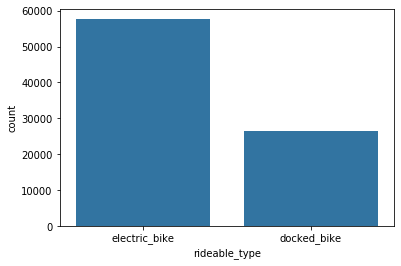

In [24]:
base_color = sns.color_palette()[0]
sns.countplot(data = clean_trip_data, x = 'rideable_type', color = base_color);

Observations:
1. Electric bikes were rented more than twice as often as docked bikes.

#### Start station

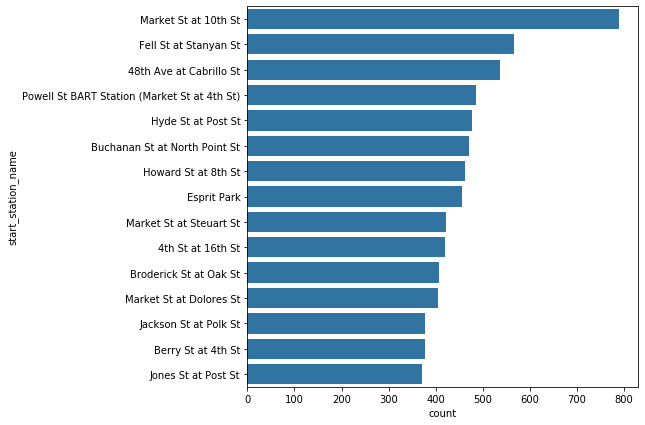

In [25]:
plt.figure(figsize=(7, 7))
popular_start_stations = clean_trip_data['start_station_name'].value_counts().index[1:16]
sns.countplot(data = clean_trip_data, y = 'start_station_name', color = base_color, order = popular_start_stations);

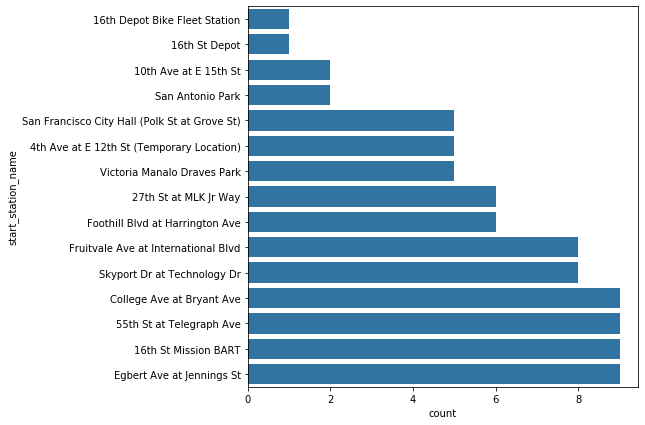

In [26]:
plt.figure(figsize=(7, 7))
unpopular_start_stations = clean_trip_data['start_station_name'].value_counts().index[-16:-1][::-1]
sns.countplot(data = clean_trip_data, y = 'start_station_name', color = base_color, order = unpopular_start_stations);

In [27]:
clean_trip_data.start_station_name.value_counts()['None']

30825

Observations:  
1. Market St at 10th St was the most common start station with a significant difference from the second one.
2. It is important to inform which stations are more or less in demand to decide which of them should have more or less bicycles available.
3. There are 30825 rides with no starting station associated.

#### End station

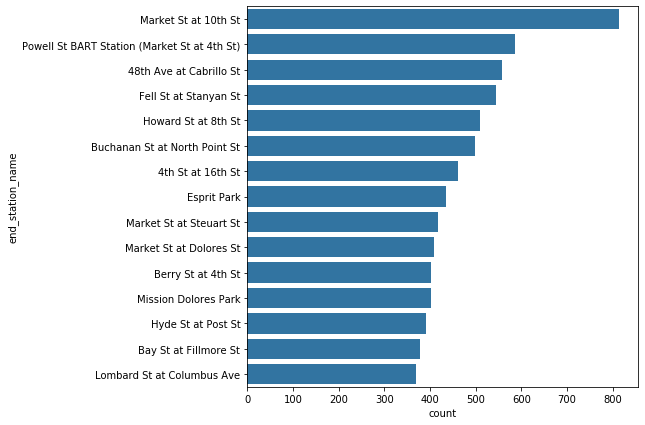

In [28]:
plt.figure(figsize=(7, 7))
popular_end_stations = clean_trip_data['end_station_name'].value_counts().index[1:16]
sns.countplot(data = clean_trip_data, y = 'end_station_name', color = base_color, order = popular_end_stations);

In [29]:
clean_trip_data.end_station_name.value_counts()['None']

32401

Observations:  
1. Once again, the Market St at 10th St was the in the top of the list, being the most common end station with a significant difference from the second one.
2. There are 32401 rides with no ending station associated.

#### Account type

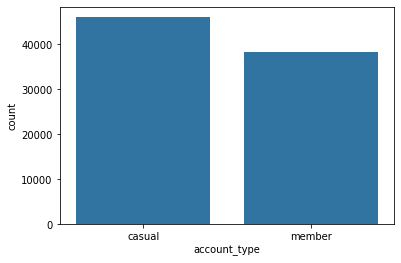

In [30]:
sns.countplot(data = clean_trip_data, x = 'account_type', color = base_color);

Observations:  
1. There were more rides by casual users than members.

#### Started hour

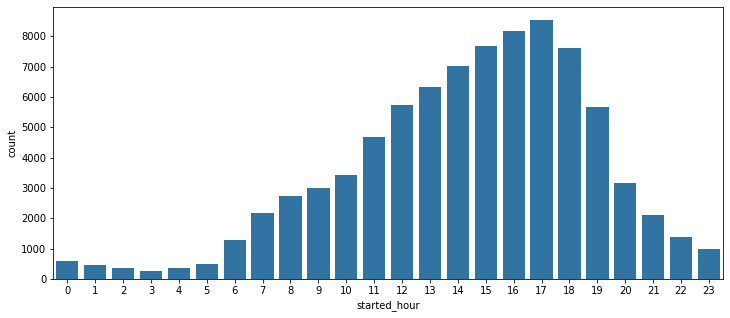

In [31]:
plt.figure(figsize=(12, 5))
sns.countplot(data = clean_trip_data, x = 'started_hour', color = base_color);

Observations:  
1. Left-skewed distribution.
2. Rental incidence decreases considerably after 8 pm and before 10 am.

#### Ended hour

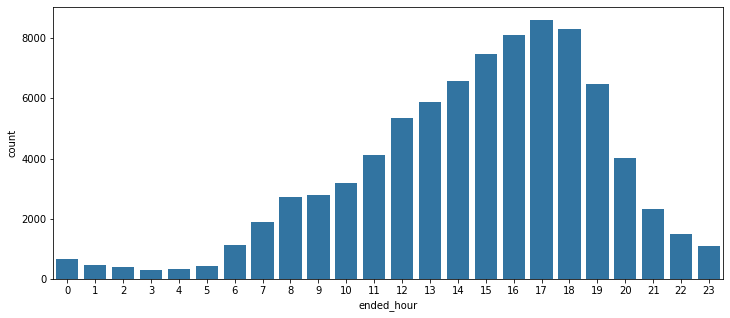

In [32]:
plt.figure(figsize=(12, 5))
sns.countplot(data = clean_trip_data, x = 'ended_hour', color = base_color);

Observations:  
1. Left-skewed distribution.
2. Very similar to the started_hour distributions, which indicates that most of the trips take a short period of time (less than 2 hours).

#### Monthday

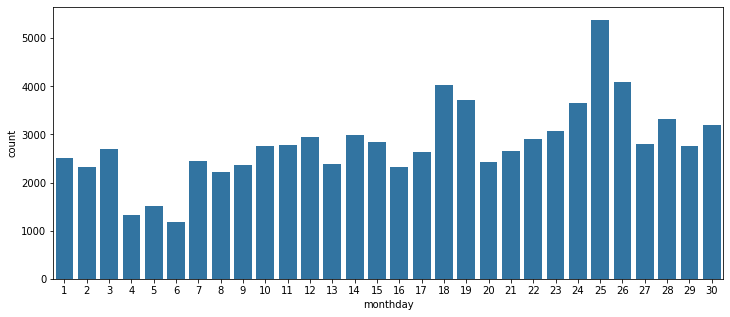

In [33]:
plt.figure(figsize=(12, 5))
sns.countplot(data = clean_trip_data, x = 'monthday', color = base_color);

Observations:  
1. Rentals below the average in days 4, 5 and 6 (I'll possibly investigate what happened in those days, checking for news or something related to the COVID-19).
2. Low variations over the month.
3. More than 5000 rides on April 25.

#### Weekday

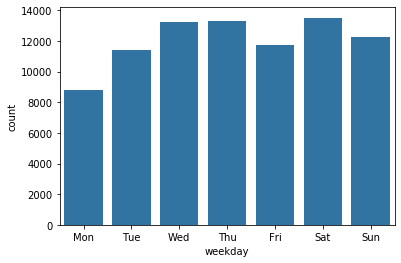

In [34]:
ax = sns.countplot(data = clean_trip_data, x = 'weekday', color = base_color, 
                   order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);

ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);

Observations:  
1. Monday below the average.
2. It doesn't seems that there's much variation between the days of the week. 

#### Trip time

In [35]:
clean_trip_data.trip_time.quantile(0.99)

129.3473333333333

In [36]:
trip_time_under_200 = clean_trip_data.query('trip_time < 200')

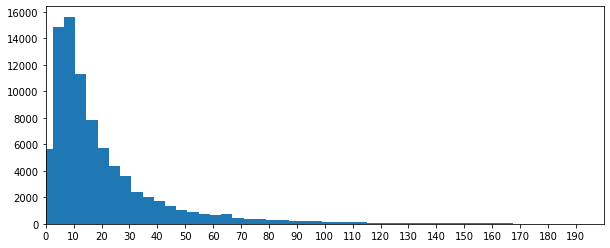

In [37]:
plt.figure(figsize=(10, 4))
plt.hist(data=trip_time_under_200, x='trip_time', bins=50)
plt.xlim(0, 200)
plt.xticks(range(0, 200, 10));

In [38]:
clean_trip_data.query('trip_time < 0')

,rideable_type,start_station_name,end_station_name,account_type,started_hour,ended_hour,monthday,weekday,trip_time
21575,docked_bike,7th Ave at Cabrillo St,Jones St at Post St,casual,19,19,18,Saturday,-0.200000
35958,docked_bike,Montgomery St BART Station (Market St at 2nd St),Powell St BART Station (Market St at 4th St),member,17,17,29,Wednesday,-0.183333
36591,docked_bike,Duboce Park,20th St at Bryant St,member,15,15,29,Wednesday,-0.333333
37164,docked_bike,Grand Ave at Perkins St,MacArthur Blvd at Telegraph Ave,casual,18,18,24,Friday,-0.133333
37540,docked_bike,Beale St at Harrison St,Buchanan St at North Point St,casual,11,11,25,Saturday,-0.133333
...,...,...,...,...,...,...,...,...,...
78738,docked_bike,Rhode Island St at 17th St,Garfield Square (25th St at Harrison St),member,15,15,29,Wednesday,-1.150000
78925,docked_bike,Parkmoor Ave at Race St,Parkmoor Ave at Race St,casual,11,11,25,Saturday,-0.083333
79596,docked_bike,Webster St at Grove St,Cyril Magnin St at Ellis St,casual,17,17,9,Thursday,-0.516667
79655,docked_bike,El Embarcadero at Grand Ave,Horton St at 40th St,member,12,12,5,Sunday,-0.550000


Observations:  
1. Right-skewed distribution.
2. 67 rows with incorrect information about the trip time.
3. 99% of the data falls between 0 and 129.35 .
4. There are some rides with more than one day of trip time, probably it's because the user forgot to return the bike, but I might search more about Bay Wheels to understand how is the process of using the bikes.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
It was possible to arrive at some conclusions about the number of rentals in each feature, such as the greater demand for electric bicycles, a list of stations with more or less occurrences of rentals (as well as returns), the bigger number of trips by casual users than members, the hours of the day with the highest number of rentals and the average duration of each trip.  
Some trips were also identified with travel time values that deserve further investigation, as they had negative or extremely high values, which caused them to be left out of the analysis.


#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
As mentioned above, the distribution of travel times had negative and extremely high values, which I decided to exclude from the analysis as they are probably user errors or data collection errors.
In addition, I expected a less uniform distribution of the weekdays, as I believed that some days would have significantly greater demands.
Below average rentals were also identified on April 4th, 5th and 6th, which I will probably investigate manually.


### Bivariate Exploration
In this section I'll be investigating relationships between pairs of variables in the data, aiming to discover patterns or correlations.

#### Rideable Type - Start Station Name

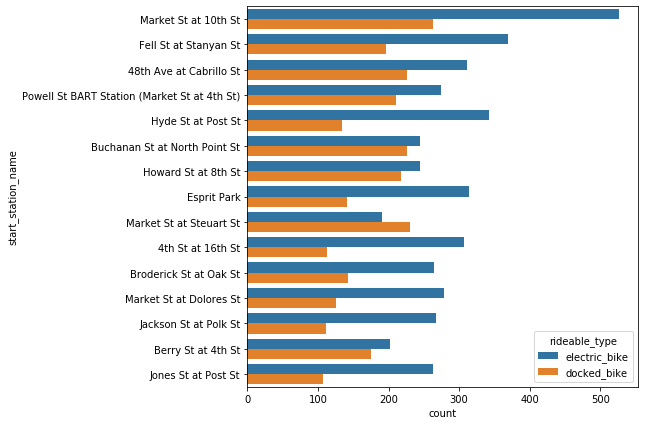

In [39]:
plt.figure(figsize=(7, 7))
sns.countplot(data = clean_trip_data, y = 'start_station_name', hue='rideable_type', order = popular_start_stations);

Observations:  
1. In general, the demand for electric bikes is greater than for docked bikes. However, the **Market St at Steuart St** station showed a higher demand for docked bikes.
2. Some stations have a similar demand for bicycles (Buchanan St at North Point St, Howard St at 8th St and Berry St at 4th St), while in others electric bikes have a huge advantage (e.g., Market St at 10th St, Hyde St at Post St, Esprit Park, 4th St at 16th St).

#### Rideable Type - Account Type

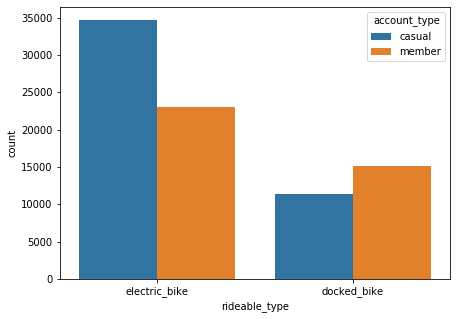

In [40]:
plt.figure(figsize=(7, 5))
sns.countplot(data = clean_trip_data, x = 'rideable_type', hue = 'account_type');

Observations:  
1. Electric bikes are mostly used by casual users, while docked bikes are mostly used by members.

#### Rideable Type - Started Hour

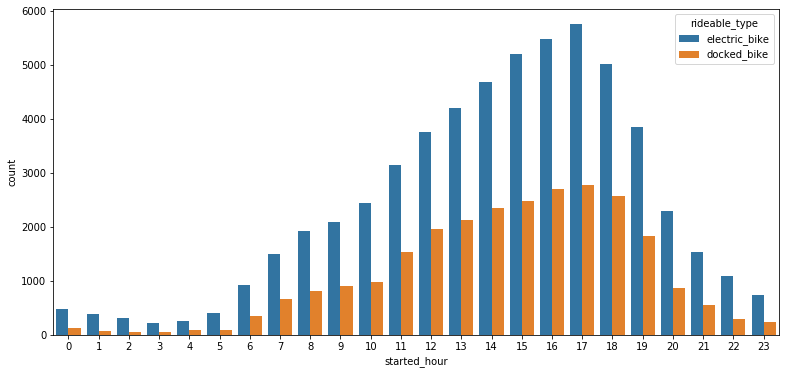

In [41]:
plt.figure(figsize=(13, 6))
ax = sns.countplot(data = clean_trip_data, x = 'started_hour', hue = 'rideable_type');

Observations:  
1. The hour of the day doesn't seems to have any affect on whether a user will use a electric or a docked bike.

#### Rideable Type - Weekday

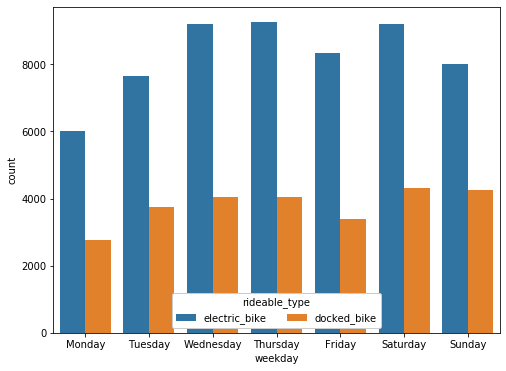

In [42]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data = clean_trip_data, x = 'weekday', hue = 'rideable_type', 
                   order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'rideable_type');

Observations:  
1. There's no significant correlation or pattern between rideable type and weekday.

#### Rideable Type - Trip Time

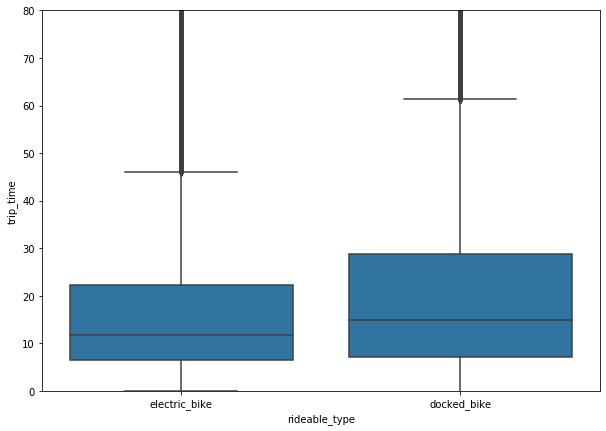

In [43]:
plt.figure(figsize=(10, 7))
sns.boxplot(data = clean_trip_data, x = 'rideable_type', y = 'trip_time', color = base_color)
plt.ylim(0, 80);

In [44]:
clean_trip_data.query('rideable_type == "electric_bike"').trip_time.max()

480.5

In [45]:
clean_trip_data.query('rideable_type == "docked_bike"').trip_time.max()

54728.86666666667

In [46]:
len(clean_trip_data.query('trip_time > 480 and rideable_type == "docked_bike"'))

202

In [47]:
len(clean_trip_data.query('trip_time > 46 and rideable_type == "electric_bike"'))

5209

In [48]:
len(clean_trip_data.query('trip_time > 61 and rideable_type == "docked_bike"'))

1859

Observations:  
1. Docked bikes trips usually takes longer than with electric bikes.
2. Electric bikes have more outliers than docked bikes, but their longest trip took about 8 hours, while docked bikes have exorbitant trip times (like 54728 minutes).

#### Started Station Name - Started Hour

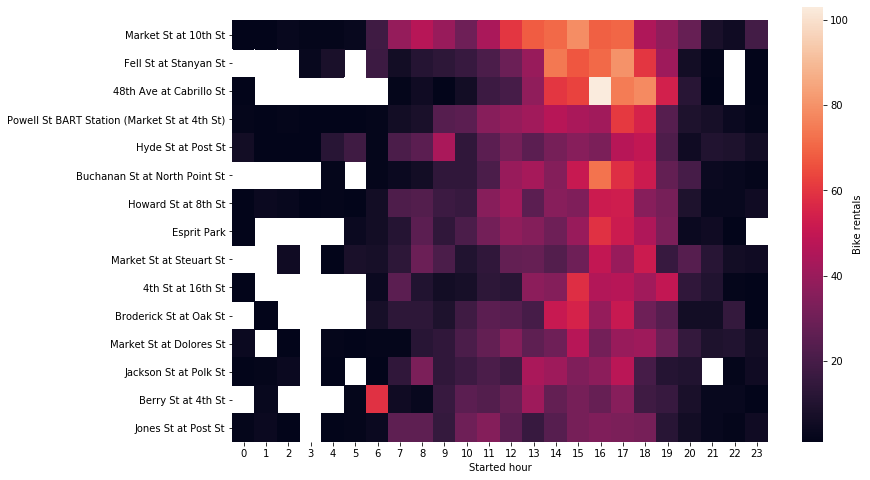

In [49]:
top_stations_df = clean_trip_data[clean_trip_data.start_station_name.isin(popular_start_stations.values)]

plt.figure(figsize=(12, 8))
ct_counts = top_stations_df.groupby(['started_hour', 'start_station_name']).size()
ct_counts = ct_counts.reset_index()
ct_counts = ct_counts.pivot(index = 'start_station_name', columns = 'started_hour')
ct_counts = ct_counts.reindex(index = popular_start_stations)
ax = sns.heatmap(ct_counts, cbar_kws={'label': 'Bike rentals'})
plt.xlabel('Started hour')
ax.set_ylim(len(popular_start_stations.values), -0.5)
ax.set_xticklabels(range(0, 24), rotation=0);

Observations:  
1. Most station rentals occur during the afternoon, but some stations also have a significant number of rentals in the morning (e.g., Market St at 10th St, Hyde St at Post St, Howard St at 8th St, Jones St at Post St).
2. The most common rental time at Berry St at 4th St is at 6 am.
3. Market St at 10th St stands out as it has rentals throughout the entire day.
4. The number of rentals at Fell St at Stanyan St and 48th Ave at Cabrillo St is very high between 2pm and 7pm, but has very low demand at other times of the day.

#### Account Type - Started Hour

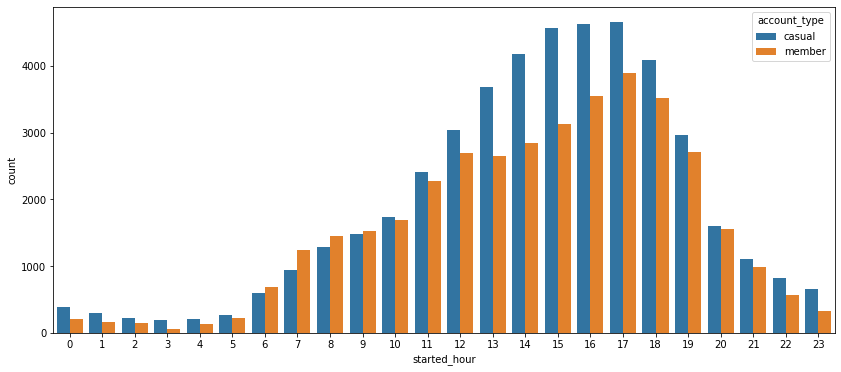

In [50]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(data = clean_trip_data, x = 'started_hour', hue = 'account_type');

Observations:  
1. The biggest difference between casual and member number of trips was in the afternoon, when there were more casual accounts renting bikes.
2. Between 6 am and 10 am there were more rentals by members, probably because these users often use the bikes to go to work/school/college or simply to practice outdoor activities.

#### Account Type - Weekday

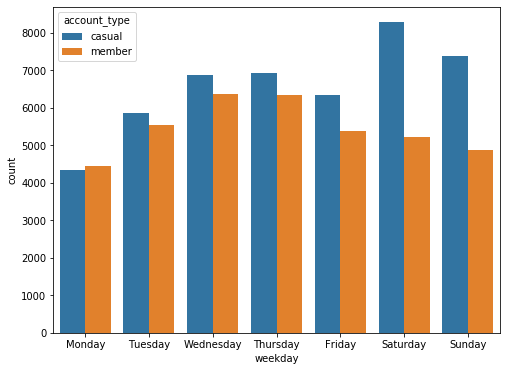

In [51]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data = clean_trip_data, x = 'weekday', hue = 'account_type', 
                   order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);

Observations:  
1. There's a notable difference in the weekend, where more casual users are renting bikes.
2. Besides the clearly higher number of rides by casual users on the weekends, the distributions are very similar.

#### Account Type - Trip Time

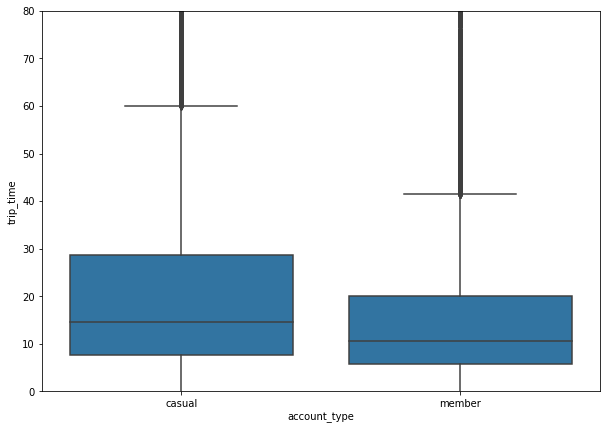

In [52]:
plt.figure(figsize=(10, 7))
sns.boxplot(data = clean_trip_data, x = 'account_type', y = 'trip_time', color = base_color)
plt.ylim(0, 80);

In [53]:
clean_trip_data.query('account_type == "casual"').trip_time.max()

54728.86666666667

In [54]:
clean_trip_data.query('account_type == "member"').trip_time.max()

24690.366666666665

In [55]:
len(clean_trip_data.query('trip_time > 60 and account_type == "casual"'))

4386

In [56]:
len(clean_trip_data.query('trip_time > 41 and account_type == "member"'))

2452

In [57]:
len(clean_trip_data.query('trip_time > 600 and account_type == "casual"'))

170

In [58]:
len(clean_trip_data.query('trip_time > 600 and account_type == "member"'))

18

Observations:  
1. Casual users rides usually take longer than member rides, though the difference isn't huge.
2. Casual users have more trip time outliers than members, and also have more extremely high values.

#### Started Hour - Weekday

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


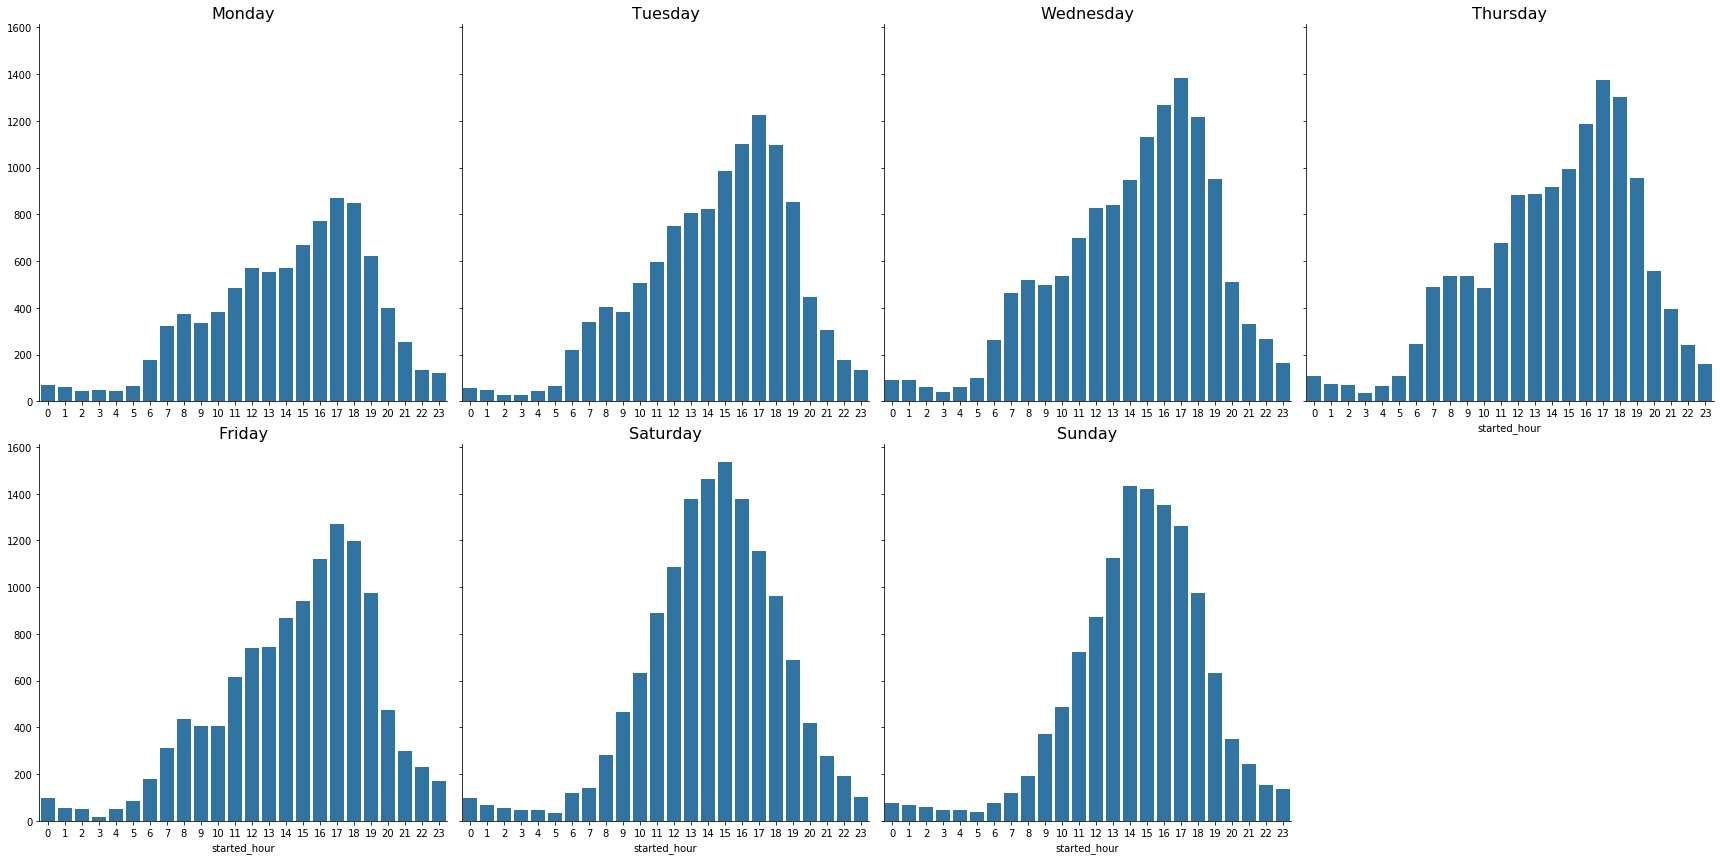

In [59]:
g = sns.FacetGrid(data = clean_trip_data, col = 'weekday', col_wrap = 4, height=6, sharex=False,
                  col_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
g.map(sns.countplot, "started_hour")
g.set_titles('{col_name}', size=16);

Observations:  
1. Similar distributions, with weekend distributions being less left-skewed.
2. Mondays had less rentals.
3. Saturday and Sunday had less rentals before 10 am.

#### Started Hour - Ended Hour

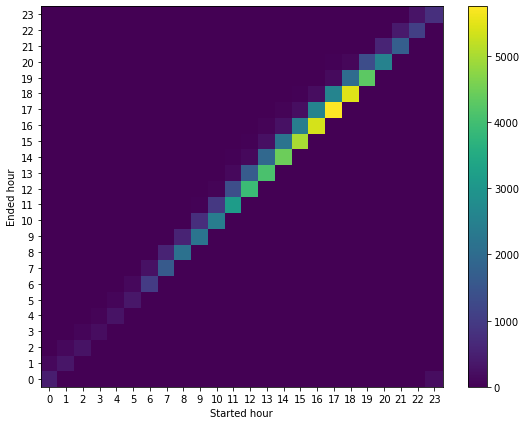

In [60]:
plt.figure(figsize=(9, 7))
bins_x = np.arange(-0.5, 24.5, 1)
bins_y = np.arange(-0.5, 24.5, 1)
plt.hist2d(data = clean_trip_data, x = 'started_hour', y = 'ended_hour', bins=[bins_x, bins_y])
plt.xlabel('Started hour')
plt.ylabel('Ended hour')
plt.xticks(range(0, 24))
plt.yticks(range(0, 24))
plt.colorbar();

Observations:  
1. Trips take less than an hour in most cases, as seen before.

#### Started Hour - Trip Time

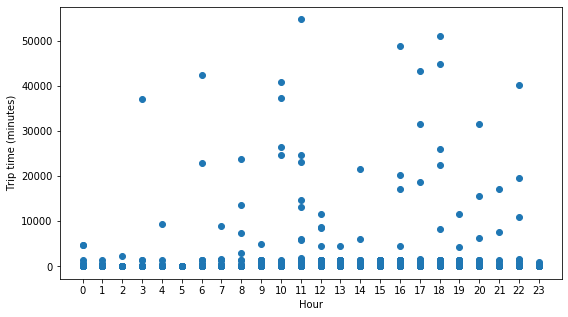

In [61]:
plt.figure(figsize=(9, 5))
plt.scatter(data = clean_trip_data, x = 'started_hour', y = 'trip_time')
plt.xlabel('Hour')
plt.ylabel('Trip time (minutes)')
plt.xticks(range(0, 24));

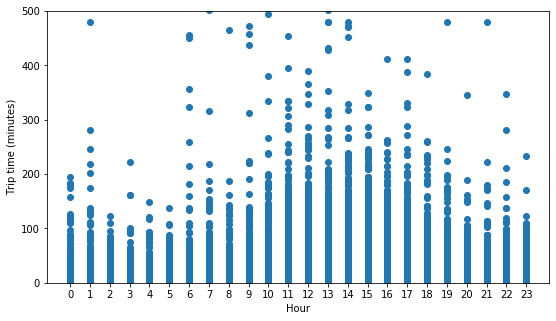

In [62]:
plt.figure(figsize=(9, 5))
plt.scatter(data = clean_trip_data, x = 'started_hour', y = 'trip_time')
plt.ylim(0, 500)
plt.xlabel('Hour')
plt.ylabel('Trip time (minutes)')
plt.xticks(range(0, 24));

Observations:  
1. It seems that there were more longer trips between 10 am and 17 pm.
2. Multiple outliers, as seen before.

#### Weekday - Trip Time

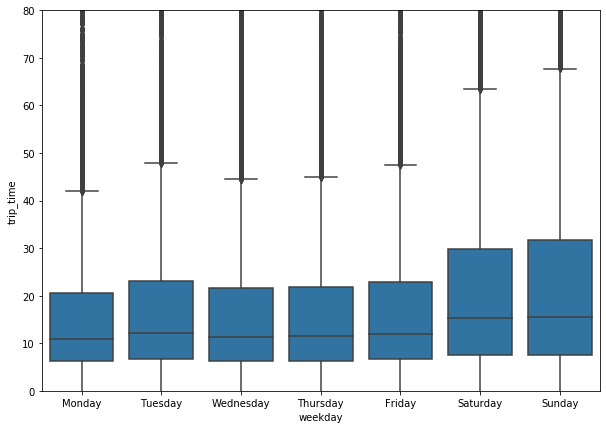

In [63]:
plt.figure(figsize=(10, 7))
sns.boxplot(data = clean_trip_data, x = 'weekday', y = 'trip_time', color = base_color, 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylim(0, 80);

Observations:  
1. There are usually more longer trips on the weekends (though the difference isn't huge).
2. There's no significant correlation between any workweek days.

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
It was possible to observe some interesting correlations regarding the number of rentals between pairs of variables, such as the majority of docked bike rentals being made by members, a notable increase in rentals by casual users on weekends, most rentals in the morning being made by members and a better understanding of the demand in each one of the most popular stations, which was possible due to the analysis of the distributions of rentals in those stations throughout the day.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Regarding the trip time, it was possible to conclude that there were more long trips on weekends and that long trips (regardless of the day) occurred more between 10 am and 17 pm. Furthermore, trips by casual users generally take longer than trips by members, as well as trips with docked bikes usually take longer than trips with electric bikes (however, these are few minutes differences, not representing strong correlations).



## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!